# BERT

### Bit Error Rate Testing for M17

This document outlines the BERT (bit error rate testing) standard for M17.
The purpose of this standard is to provide test equipment and device equipment
manufacturers with a standard means of testing the performance of M17 devices.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

Please attribute the work to *Rob Riggs, WX9O, Mobilinkd LLC*.

## PRBS9

The standard for testing M17 is using the PRBS9 generator.  This uses a LFSR
with the polynomial

  $ x^{9}+x^{5}+1 $

In [1]:
%pylab inline

import numpy as np
from pylfsr import LFSR

Populating the interactive namespace from numpy and matplotlib


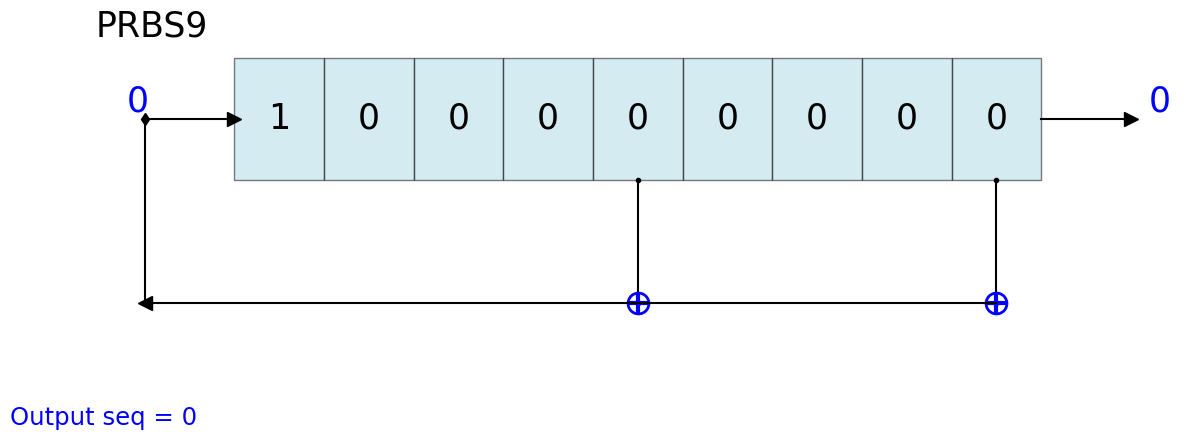

In [2]:
state = [1,0,0,0,0,0,0,0,0]
fpoly = [9,5]
L = LFSR(initstate=state,fpoly=fpoly,counter_start_zero=False)
L.Viz(show=False, show_labels=False,title='PRBS9')
plt.savefig("PRBS9.svg")

In [3]:
L.runKCycle(197+9)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1])

1. Periodicity
------------------
 - Expected period = 2^M-1 = 511
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period): (N1s,N0s) =  (256, 255)
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs in a period should be of specific order, e.g. [4,2,1,1]
 - Runs:  [128  64  32  16   8   4   2   1   1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else
 - Rxx(k):  [ 1.         -0.00195695 -0.00195695 ... -0.00195695 -0.00195695
  1.        ]


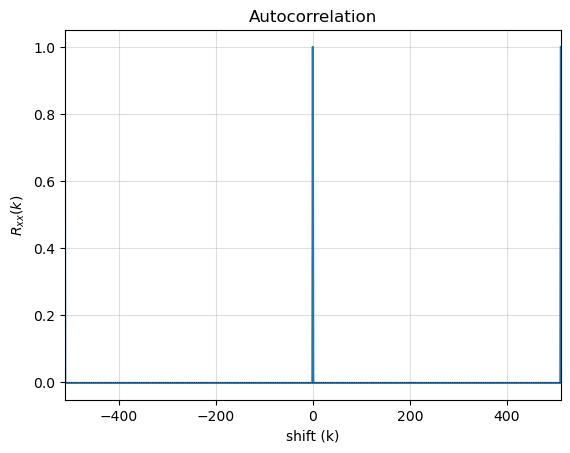

 - Pass?:  True



Passed all the tests


True

In [4]:
L.test_properties(verbose=2)

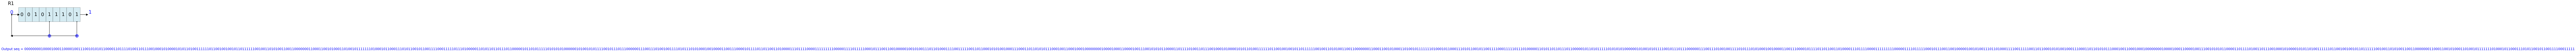

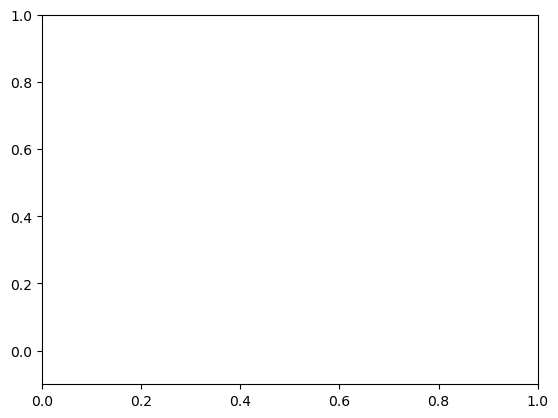

In [5]:
fig, ax = plt.subplots(figsize=(8,3))
for _ in range(1):
  ax.clear()
  L.Viz(ax=ax, title='R1')
  plt.ylim([-0.1,None])
  #plt.tight_layout()
  L.next()
  fig.canvas.draw()
  plt.pause(0.1)

In [6]:
import pygraphviz as pgv
from IPython.display import Image,SVG

def svg(dot):
    return SVG(pgv.AGraph(dot).draw(format='svg', prog='dot'))
def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

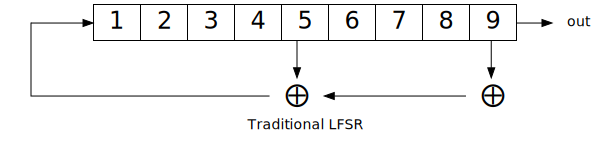

In [13]:
g0 = """digraph {
    graph [splines=ortho;];
    fontname="DejaVu Sans";
    label = "Traditional LFSR";
    /* Node customization. */
    {
        struct1 [shape=record;fontname="DejaVu Sans", fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];
        
        
        out [label="out", fontname="DejaVu Sans", shape=none];

        plus2 [label="⨁", fontname="DejaVu Sans", fontsize=24, shape=none];
        plus3 [label="⨁", fontname="DejaVu Sans", fontsize=24, shape=none];
        alignment1 [label=" ", fontsize=24, shape=none, peripheries=0];    }
      
    { rank = min; alignment1; struct1; out;};
    { rank = same; plus3; plus2};

    subgraph cluster1 {
        struct1:b8:s -> plus3;
    }
    
    subgraph cluster2 {
        struct1:b4s -> plus2;
    }
    
    subgraph cluster3 {
        alignment1 -> struct1:b0 [tailclip=false];
    }

    subgraph cluster4 {
        alignment1-> plus2 [dir=none, tailclip=false];
        plus2 -> plus3 [dir=back, fontname="DejaVu Sans Mono", label="               "];
    }
    
    subgraph cluster5 {
        struct1:b8:e -> out;
    }
}
"""

svg(g0)

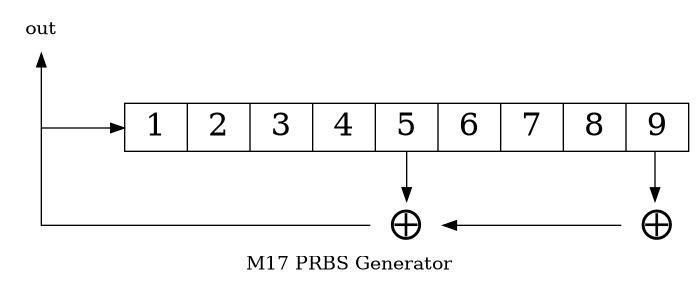

In [8]:
g1 = """digraph {
    graph [splines=ortho];
    label = "M17 PRBS Generator";
    /* Node customization. */
    {
        struct1 [shape=record;fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];
        
        
        out [label="out", shape=none];

        plus2 [label="⨁", fontname="DejaVu Sans", fontsize=24, shape=none];
        plus3 [label="⨁", fontname="DejaVu Sans", fontsize=24, shape=none];
        alignment1 [label=" ", fontsize=24, shape=none, peripheries=0];    }
      
    { rank = min; out;};
    { rank = same; alignment1; struct1;};
    { rank = same; plus3; plus2};

    subgraph cluster1 {
        struct1:b8:s -> plus3;
    }
    
    subgraph cluster2 {
        struct1:b4s -> plus2;
    }
    
    subgraph cluster3 {
        alignment1 -> struct1:b0 [tailclip=false];
    }
    
    subgraph cluster4 {
        alignment1-> plus2 [dir=none, tailclip=false];
        plus2 -> plus3 [dir=back, fontname="DejaVu Sans Mono", label="              "];
    }
    alignment1 -> out [tailclip=false];
}
"""

draw(g1)

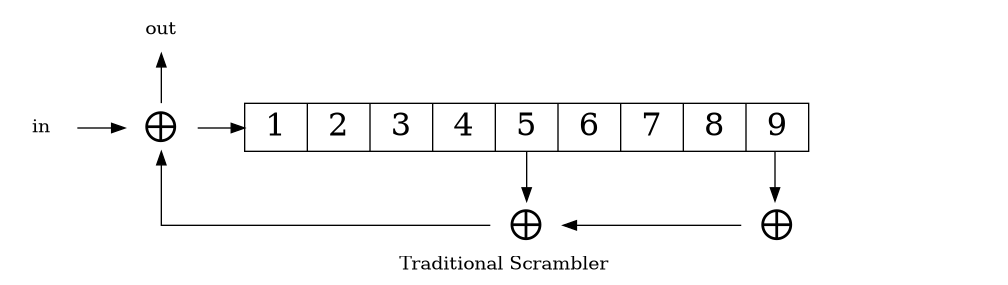

In [14]:
g2 = """digraph {
    graph [splines=ortho];
    label = "Traditional Scrambler"
    /* Node customization. */
    {
        struct1 [shape=record;fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];
        
        out [label="out", shape=none];
        in [label="in", shape=none];

        plus1 [label="⨁", fontsize=24, shape=none];
        plus2 [label="⨁", fontsize=24, shape=none];
        plus3 [label="⨁", fontsize=24, shape=none];
        alignment1 [style=invis, width=0.1];
    }
    
    { rank = min; out;};
    { rank = same; in; plus1; struct1; alignment1;};
    { rank = same; plus3; plus2};

    subgraph from_9 {
        struct1:b8:s -> plus2;
    }

    subgraph from_4 {
        struct1:b4:s -> plus3;
    }

    subgraph cluster {
        in -> plus1 -> {struct1:b0,out};
        plus1 -> plus3 [dir=back];
        plus3 -> plus2 [dir=back, fontname="DejaVu Sans Mono", label="              "];
    }
}
"""

draw(g2)

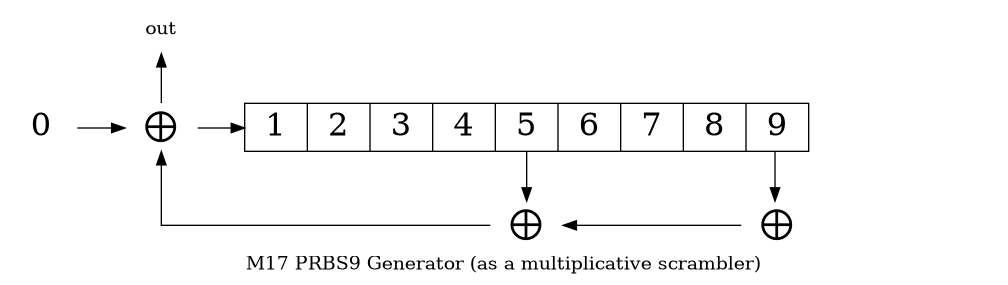

In [10]:
g2 = """digraph {
    graph [splines=ortho];
    label = "M17 PRBS9 Generator (as a multiplicative scrambler)"
    /* Node customization. */
    {
        struct1 [shape=record;fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];
        
        out [label="out", shape=none];

        zero [label="0", fontsize=24, shape=none];
        plus1 [label="⨁", fontsize=24, shape=none];
        plus2 [label="⨁", fontsize=24, shape=none];
        plus3 [label="⨁", fontsize=24, shape=none];
        alignment1 [style=invis, width=0.1];
    }
    
    { rank = min; out;};
    { rank = same; zero; plus1; struct1; alignment1;};
    { rank = same; plus3; plus2};

    subgraph {
        struct1:b8:s -> plus2;
    }

    zero -> plus1 -> {struct1:b0,out};
    struct1:b4:s -> plus3;
    plus1 -> plus3 [dir=back];
    plus3 -> plus2 [dir=back, fontname="DejaVu Sans Mono", label="              "];
}
"""

draw(g2)

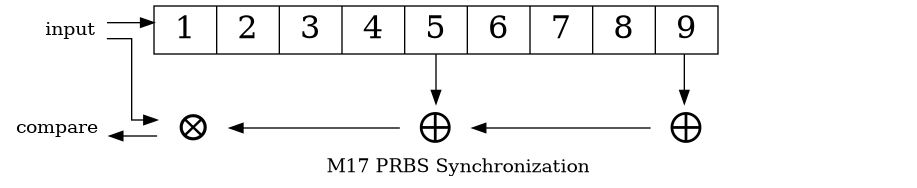

In [11]:
g3 = """digraph {
    graph [splines=ortho];
    label = "M17 PRBS Synchronization";
    /* Node customization. */
    {
        struct1 [shape=record;fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];
        
        out [label="compare", shape=none];
        in [label="input", shape=none];

        compare [label="⭙", fontsize=24, shape=none];
        plus2 [label="⨁", fontsize=24, shape=none];
        plus3 [label="⨁", fontsize=24, shape=none];
        alignment1 [style=invis, width=0.1];
    }
    

    { rank = same; in; struct1; alignment1;};
    { rank = same; out, compare; plus3; plus2};

    in -> compare;
    in -> {struct1:b0};
    out -> compare [dir=back];
    struct1:b4 -> plus3;
    compare -> plus3 [dir=back];
    struct1:b8 -> plus2 [align=right];
    plus3 -> plus2 [dir=back, fontname="DejaVu Sans Mono", label="              "];
}
"""

draw(g3)

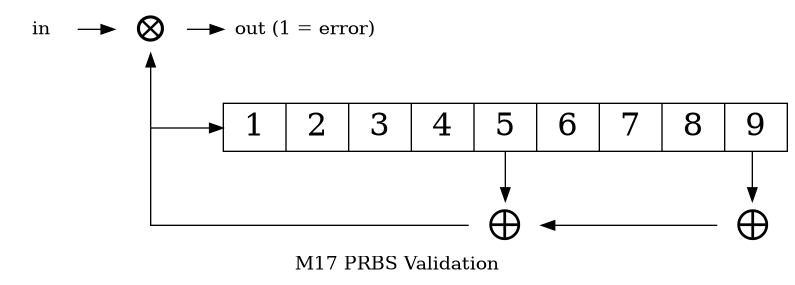

In [12]:
g4 = """digraph {
    graph [splines=ortho, nodesep=0.0];
    label = "M17 PRBS Validation";
    /* Node customization. */
    {
        struct1 [shape=record;fontsize=24, label="{<b0>&nbsp;1&nbsp;}|
            {<b1>&nbsp;2&nbsp;}|{<b2>&nbsp;3&nbsp;}|{<b3>&nbsp;4&nbsp;}|{<b4>&nbsp;5&nbsp;}|
            {<b5>&nbsp;6&nbsp;}|{<b6>&nbsp;7&nbsp;}|{<b7>&nbsp;8&nbsp;}|{<b8>&nbsp;9&nbsp;}"];

        in [label="in", shape=none];
        out [label="out (1 = error)", shape=none];

        compare [label="⭙", fontsize=24, shape=none];
        plus2 [label="⨁", fontsize=24, shape=none];
        plus3 [label="⨁", fontsize=24, shape=none];
        alignment1 [label=" ", fontsize=24, shape=none, peripheries=0];
    }

    { rank = min; in; compare; out;};
    { rank = same; alignment1; struct1;};
    { rank = same; plus3; plus2};

    subgraph cluster1 {
        struct1:b8:s -> plus3;
    }
    
    subgraph cluster2 {
        struct1:b4:s -> plus2;
    }
    
    subgraph cluster3 {
        alignment1 -> struct1:b0 [tailclip=false];
    }

    subgraph cluster4 {
        alignment1-> plus2 [dir=none, tailclip=false];
        plus2 -> plus3 [dir=back, fontname="DejaVu Sans Mono", label="              "];
    }
    
    graph [nodesep=0.2]
    alignment1 -> compare [tailclip=false];
    in -> compare -> out;
}
"""

draw(g4)